# C_1choose_learning_machine_models with SMOTE


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the file 
data = pd.read_csv('../data/cleaned_data/re_cleaned_data.csv')
data.head()


,monthly_charges,total_charges,senior_citizen_No,senior_citizen_Yes,partner_No,partner_Yes,dependents_No,dependents_Yes,multiple_lines_No,multiple_lines_No phone service,...,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,churn
0,0.123197,0.032379,1,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,No
1,0.399669,0.592184,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,No
2,0.368614,0.147354,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,Yes
3,0.251741,0.586480,1,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,No
4,0.536070,0.184582,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,Yes


In [3]:
data.shape

(7032, 42)

### x/y split

In [4]:
#separate the features from the labels
y = data['churn']
X = data.drop(['churn'], axis=1)

In [5]:
# change the type of 'y'
y.dtypes

dtype('O')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
display(y_train.value_counts())
display(y_test.value_counts())

churn
No     4130
Yes    1495
Name: count, dtype: int64

churn
No     1033
Yes     374
Name: count, dtype: int64

#### It is imbalanced,so it needs up/down sampling or SMOTE

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# Fit and apply SMOTE to generate synthetic samples for the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [9]:
X_resampled.shape

(8260, 41)

In [10]:
class_counts = y_resampled.value_counts()
print(class_counts)

churn
Yes    4130
No     4130
Name: count, dtype: int64


In [11]:
# save 
X_resampled.to_csv('../data/x_y_data/re_smote/X_resampled.csv', index=False)
y_resampled.to_csv('../data/x_y_data/re_smote/y_resampled.csv', index=False)
X_test.to_csv('../data/x_y_data/re_smote/X_test.csv', index=False)
y_test.to_csv('../data/x_y_data/re_smote/y_test.csv', index=False)

### Choosing models

In [12]:
X_resampled.shape

(8260, 41)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('GB', GradientBoostingClassifier(random_state = 12345)))

#### Kappa

In [14]:
# evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

X_resampled2 = np.ascontiguousarray(X_resampled)
y_resampled2 = np.ascontiguousarray(y_resampled)


kappa_scorer = make_scorer(cohen_kappa_score)

names = []
results = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results = cross_val_score(model, X_resampled2, y_resampled2, cv=kfold, scoring=kappa_scorer)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} ({cv_results.std()})"
    print(msg)


LR: 0.3636400230145969 (0.2464455103283477)
KNN: 0.3523415045514948 (0.2356804596825976)
RF: 0.39230152297086635 (0.2618690927315959)
GB: 0.35581857440691933 (0.24290332719951055)


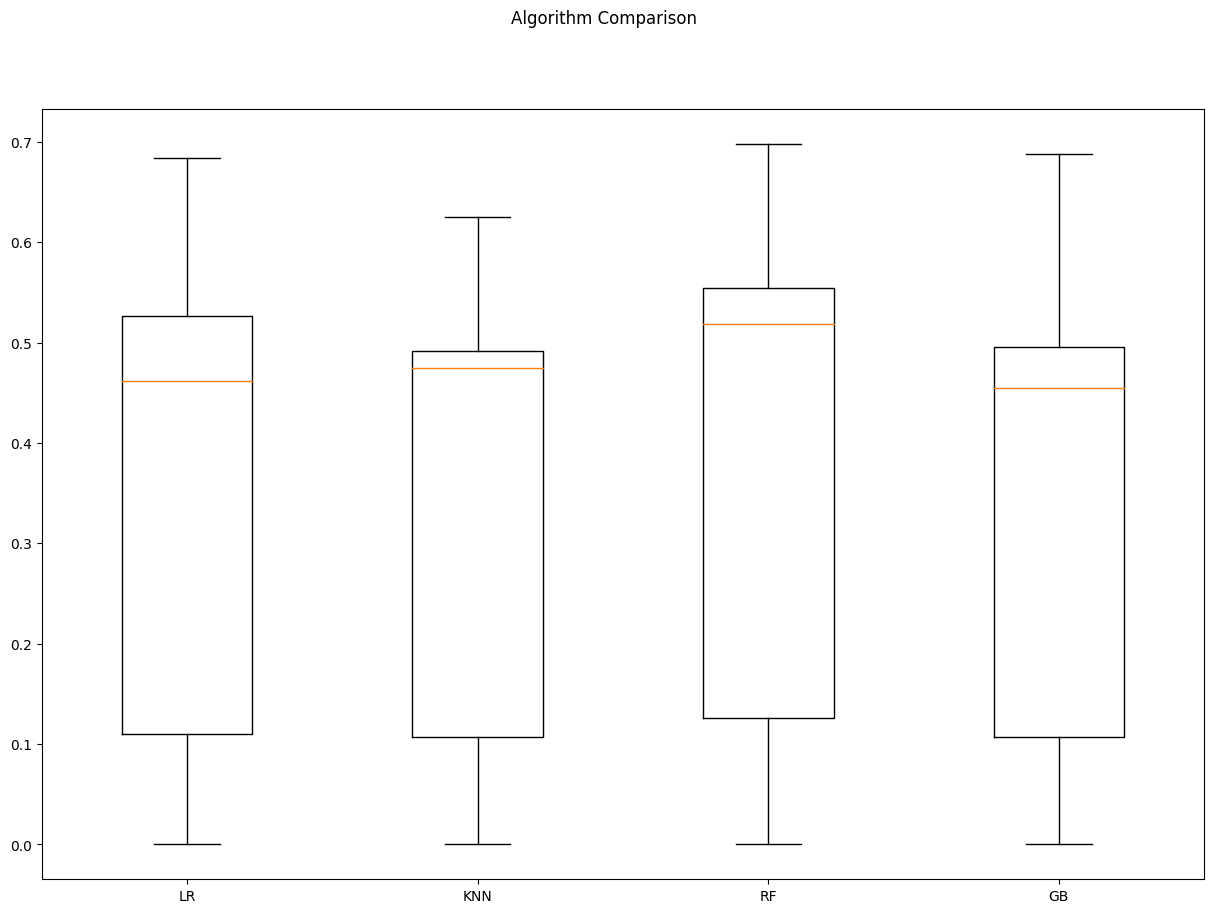

In [15]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:
results_dict = {name: result for name, result in zip(names, results)}

# Create the DataFrame using the dictionary
score = pd.DataFrame(results_dict)

# Print the DataFrame
display(score)

,LR,KNN,RF,GB
0,0.529616,0.537154,0.579259,0.500389
1,0.516683,0.490616,0.552007,0.471957
2,0.459724,0.482352,0.519530,0.429013
3,0.439038,0.428859,0.517844,0.437273
4,0.464479,0.467621,0.501838,0.481352
5,0.543408,0.492183,0.554972,0.550454
6,0.683451,0.624630,0.697565,0.687748
7,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000
